In [2]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(2848, 4288, 3)

In [3]:
import tensorflow as tf

# List available GPU devices and store them in the 'gpus' variable
gpus = tf.config.experimental.list_physical_devices('GPU')

# If there are GPU devices, enable memory growth for each device
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)  # Print error message if a RuntimeError occurs

In [5]:
# Set the paths for train, test, and validation directories
train_dir = "/content/drive/MyDrive/UCLan/AI/SkinLesions/train"
test_dir = "/content/drive/MyDrive/UCLan/AI/SkinLesions/test"
val_dir = "/content/drive/MyDrive/UCLan/AI/SkinLesions/valid"

In [6]:
# processing the datasets
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [7]:
# Generate training, testing, and validation data using the ImageDataGenerator
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )
test_data = train_gen.flow_from_directory(test_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )
val_data = train_gen.flow_from_directory(val_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )

Found 1738 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [8]:
train_data.num_classes

3

In [10]:
image, label = train_data.next()

print(image.shape)
print(label.shape)

(64, 224, 224, 3)
(64, 3)


In [ ]:
# augmenting train data
import tensorflow as tf

train_aug = tf.keras.preprocessing.image.ImageDataGenerator(
                                             rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True
                                             )



train_data_aug = train_aug.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=64,
                                               class_mode='categorical')

Found 1738 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Load the InceptionV3 model without the top layer and set it as untrainable
inception_base = tf.keras.applications.InceptionV3(include_top=False)
inception_base.trainable = False

# Create a new model using the InceptionV3 base and custom layers
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inception_base(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x)

# Instantiate the custom model with the specified inputs and outputs
inception_model = tf.keras.Model(inputs, outputs)


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
#Compile the model
inception_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [ ]:
#Fit the data to the Inception v3 model:
inception_model.fit(
    train_data_aug,
    epochs=25,
    steps_per_epoch=len(train_data_aug),
    validation_data=val_data,
    validation_steps=len(val_data),
)


Epoch 1/25
28/28 [==============================] - 400s 14s/step - loss: 0.6297 - accuracy: 0.7468 - val_loss: 1.1885 - val_accuracy: 0.5200
Epoch 2/25
28/28 [==============================] - 311s 11s/step - loss: 0.5309 - accuracy: 0.7785 - val_loss: 1.3669 - val_accuracy: 0.5533
Epoch 3/25
28/28 [==============================] - 305s 11s/step - loss: 0.5192 - accuracy: 0.7808 - val_loss: 1.5453 - val_accuracy: 0.5333
Epoch 4/25
28/28 [==============================] - 301s 11s/step - loss: 0.5100 - accuracy: 0.7865 - val_loss: 1.0320 - val_accuracy: 0.6067
Epoch 5/25
28/28 [==============================] - 298s 11s/step - loss: 0.4674 - accuracy: 0.7980 - val_loss: 1.6156 - val_accuracy: 0.5667
Epoch 6/25
28/28 [==============================] - 298s 11s/step - loss: 0.4695 - accuracy: 0.8078 - val_loss: 1.5056 - val_accuracy: 0.5400
Epoch 7/25
28/28 [==============================] - 294s 11s/step - loss: 0.4526 - accuracy: 0.8067 - val_loss: 1.7485 - val_accuracy: 0.5533
Epoch 

10/10 [==============================] - 287s 29s/step - loss: 0.9372 - accuracy: 0.6200
Inception v3 Model Accuracy: 62.00%


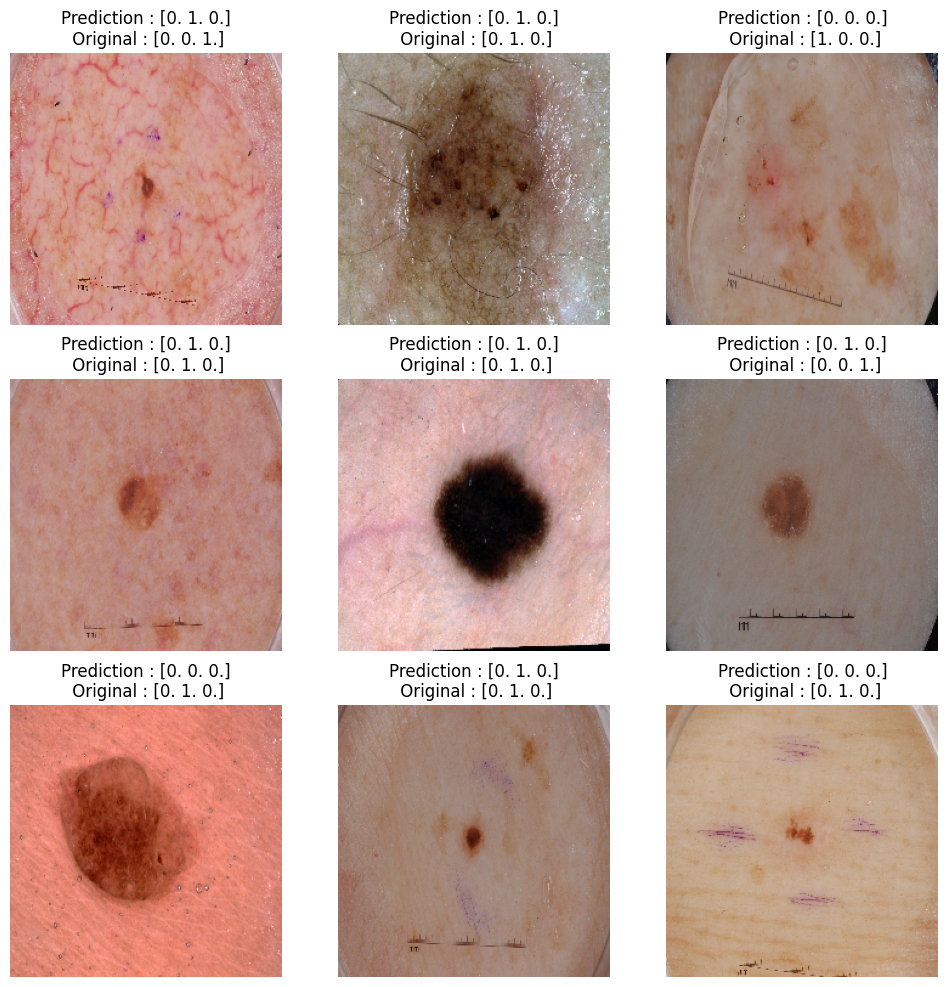

In [ ]:
import matplotlib.pyplot as plt

# Create a 3x3 grid of subplots for displaying images and predictions
plt.figure(figsize=(12, 12))

# Loop through 9 images, predict their labels using InceptionV3, and display them with their predictions
for i in range(9):
    image, label = test_data.next()
    inception_model_prediction = inception_model.predict(image)

    plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    plt.title(
        f"Prediction : {tf.round(inception_model_prediction[i])}\n Original : {label[i]}"
    )
    plt.axis("off")

# Evaluate the InceptionV3 model on the test data and print its accuracy
inception_model_evaluation = inception_model.evaluate(test_data)
print(f"Inception v3 Model Accuracy: {inception_model_evaluation[1] * 100:.2f}%")

In [ ]:
#Get accuracy
inception_model_evaluation = inception_model.evaluate(test_data)

print(f"Inception v3 Model Accuracy: {inception_model_evaluation[1] * 100:.2f}%")

10/10 [==============================] - 277s 28s/step - loss: 1.4336 - accuracy: 0.6750
Inception v3 Model Accuracy: 67.50%


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Processing Test Data:   0%|          | 0/10 [00:00<?, ?it/s]

2/2 [==============================] - 0s 97ms/step


Processing Test Data:  10%|█         | 1/10 [00:47<07:06, 47.36s/it]

2/2 [==============================] - 0s 91ms/step


Processing Test Data:  20%|██        | 2/10 [01:13<04:38, 34.77s/it]

2/2 [==============================] - 0s 99ms/step


Processing Test Data:  30%|███       | 3/10 [01:44<03:50, 32.97s/it]

2/2 [==============================] - 0s 98ms/step


Processing Test Data:  40%|████      | 4/10 [02:12<03:06, 31.08s/it]

2/2 [==============================] - 0s 100ms/step


Processing Test Data:  50%|█████     | 5/10 [02:51<02:49, 33.89s/it]

2/2 [==============================] - 0s 96ms/step


Processing Test Data:  60%|██████    | 6/10 [03:25<02:15, 33.86s/it]

2/2 [==============================] - 0s 98ms/step


Processing Test Data:  70%|███████   | 7/10 [03:58<01:41, 33.83s/it]

2/2 [==============================] - 0s 98ms/step


Processing Test Data:  80%|████████  | 8/10 [04:34<01:08, 34.29s/it]

1/1 [==============================] - 0s 57ms/step


Processing Test Data:  90%|█████████ | 9/10 [04:44<00:26, 26.97s/it]

2/2 [==============================] - 0s 93ms/step


Processing Test Data:  90%|█████████ | 9/10 [05:15<00:35, 35.04s/it]


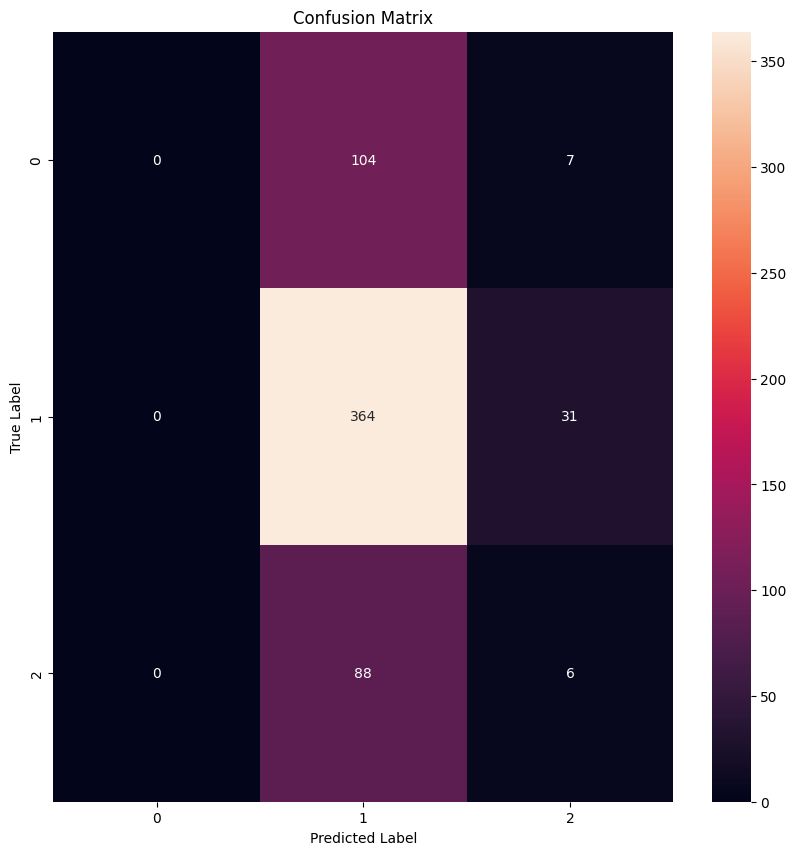

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize empty lists to store true labels and predicted labels
y_true = []
y_pred = []

# Loop through the test data to generate true and predicted labels
i = 0
for images, labels in tqdm(test_data, desc="Processing Test Data"):
    y_true.extend(np.argmax(labels, axis=1))
    predictions = inception_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    i = i+1
    if i == 10:
        break

# Create a confusion matrix using true and predicted labels
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

class_names = list(test_data.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))


                      precision    recall  f1-score   support

            melanoma       0.00      0.00      0.00       111
               nevus       0.65      0.92      0.77       395
seborrheic_keratosis       0.14      0.06      0.09        94

            accuracy                           0.62       600
           macro avg       0.26      0.33      0.28       600
        weighted avg       0.45      0.62      0.52       600



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10/10 [==============================] - 286s 28s/step


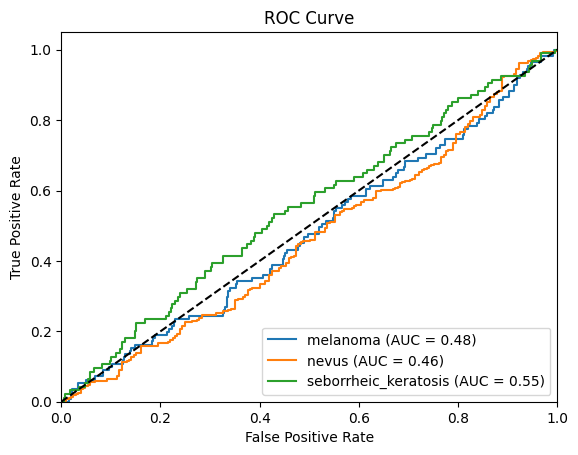

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the true and predicted labels for ROC curve calculations
n_classes = 3
y_true_bin = label_binarize(y_true, classes=range(n_classes))
y_pred_bin = inception_model.predict(test_data)

# Initialize dictionaries for false positive rates, true positive rates, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class and display the AUC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Add a diagonal line representing the "no discrimination" classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Epoch 1/5
28/28 [==============================] - 485s 17s/step - loss: 0.6355 - accuracy: 0.7652 - val_loss: 1.2564 - val_accuracy: 0.5400
Epoch 2/5
28/28 [==============================] - 318s 11s/step - loss: 0.4966 - accuracy: 0.7917 - val_loss: 1.4180 - val_accuracy: 0.5467
Epoch 3/5
28/28 [==============================] - 283s 10s/step - loss: 0.4462 - accuracy: 0.8130 - val_loss: 1.4036 - val_accuracy: 0.5867
Epoch 4/5
28/28 [==============================] - 283s 10s/step - loss: 0.4186 - accuracy: 0.8297 - val_loss: 1.3072 - val_accuracy: 0.6000
Epoch 5/5
28/28 [==============================] - 281s 10s/step - loss: 0.4199 - accuracy: 0.8222 - val_loss: 1.5939 - val_accuracy: 0.5800


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

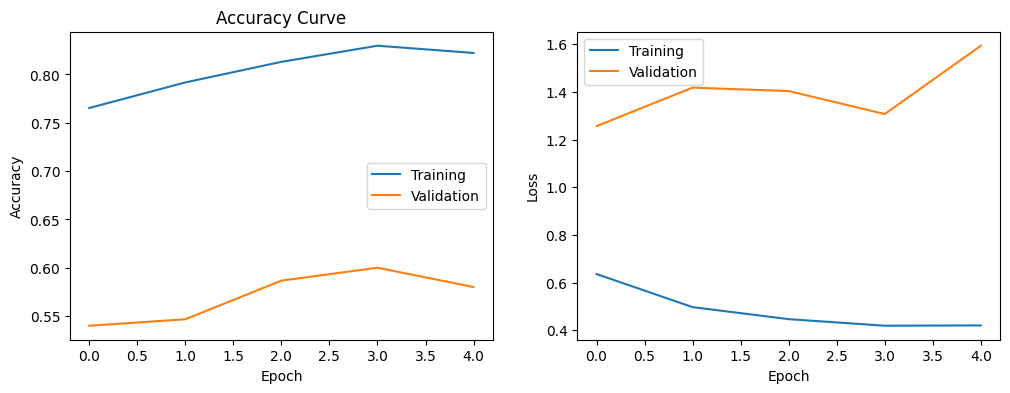

In [ ]:
# Train the InceptionV3 model and store the training history
history = inception_model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
)

# Create subplots for displaying accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot the training and validation accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

# Plot the training and validation loss curves
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Display the plots
plt.show()

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

train_dir = "/content/drive/MyDrive/UCLan/AI/SkinLesions/train"
test_dir = "/content/drive/MyDrive/UCLan/AI/SkinLesions/test"
val_dir = "/content/drive/MyDrive/UCLan/AI/SkinLesions/valid"


In [12]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(224, 224), class_mode="categorical", batch_size=64)
test_data = test_gen.flow_from_directory(test_dir, target_size=(224, 224), class_mode="categorical", batch_size=64)
val_data = val_gen.flow_from_directory(val_dir, target_size=(224, 224), class_mode="categorical", batch_size=64)


Found 1738 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [13]:
# Load the DenseNet169 model without the top layer and set it as untrainable
densenet_base = tf.keras.applications.DenseNet169(include_top=False, input_shape=(224, 224, 3))
densenet_base.trainable = False

# Create a new model using the DenseNet169 base and custom layers
inputs = tf.keras.Input(shape=(224, 224, 3))
x = densenet_base(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x)

# Instantiate the custom model with the specified inputs and outputs
densenet_model = tf.keras.Model(inputs, outputs)

# Compile the DenseNet169-based model with categorical_crossentropy loss, Adam optimizer, and accuracy metric
densenet_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
densenet_model.fit(
    train_data,
    epochs=25,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data)
)


Epoch 1/25
28/28 [==============================] - 514s 17s/step - loss: 0.6114 - accuracy: 0.7589 - val_loss: 1.4328 - val_accuracy: 0.5267
Epoch 2/25
28/28 [==============================] - 287s 10s/step - loss: 0.5032 - accuracy: 0.7808 - val_loss: 1.3307 - val_accuracy: 0.5667
Epoch 3/25
28/28 [==============================] - 317s 11s/step - loss: 0.4451 - accuracy: 0.8199 - val_loss: 1.6861 - val_accuracy: 0.5467
Epoch 4/25
28/28 [==============================] - 279s 10s/step - loss: 0.4168 - accuracy: 0.8170 - val_loss: 1.3480 - val_accuracy: 0.6267
Epoch 5/25
28/28 [==============================] - 278s 10s/step - loss: 0.3614 - accuracy: 0.8504 - val_loss: 1.4608 - val_accuracy: 0.6600
Epoch 6/25
28/28 [==============================] - 278s 10s/step - loss: 0.3358 - accuracy: 0.8596 - val_loss: 1.8518 - val_accuracy: 0.6267
Epoch 7/25
28/28 [==============================] - 313s 11s/step - loss: 0.3148 - accuracy: 0.8688 - val_loss: 1.7393 - val_accuracy: 0.6267
Epoch 

In [ ]:
# Set the DenseNet169 base model as trainable and freeze all layers except the last 5
densenet_base.trainable = True

for layer in densenet_base.layers[:-5]:
    layer.trainable = False

# Recompile the DenseNet169-based model with the updated layer configurations
densenet_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fine-tune the DenseNet169-based model on the train_data for 5 epochs and validate on val_data
densenet_model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data)
)

Epoch 1/5
28/28 [==============================] - 313s 11s/step - loss: 0.2417 - accuracy: 0.9177 - val_loss: 2.3038 - val_accuracy: 0.5867
Epoch 2/5
28/28 [==============================] - 319s 11s/step - loss: 0.0846 - accuracy: 0.9701 - val_loss: 2.4433 - val_accuracy: 0.6133
Epoch 3/5
28/28 [==============================] - 281s 10s/step - loss: 0.0651 - accuracy: 0.9781 - val_loss: 2.9230 - val_accuracy: 0.6200
Epoch 4/5
28/28 [==============================] - 281s 10s/step - loss: 0.0546 - accuracy: 0.9816 - val_loss: 2.9449 - val_accuracy: 0.5800
Epoch 5/5
28/28 [==============================] - 282s 10s/step - loss: 0.0391 - accuracy: 0.9862 - val_loss: 2.8187 - val_accuracy: 0.6200


In [ ]:
#Get accuracy of the model
densenet_model_evaluation = densenet_model.evaluate(test_data)
print(f"DenseNet Model Accuracy: {densenet_model_evaluation[1] * 100 : 0.2f}%")

10/10 [==============================] - 569s 60s/step - loss: 2.1668 - accuracy: 0.6833
DenseNet Model Accuracy:  68.33%


1/1 [==============================] - 0s 57ms/step


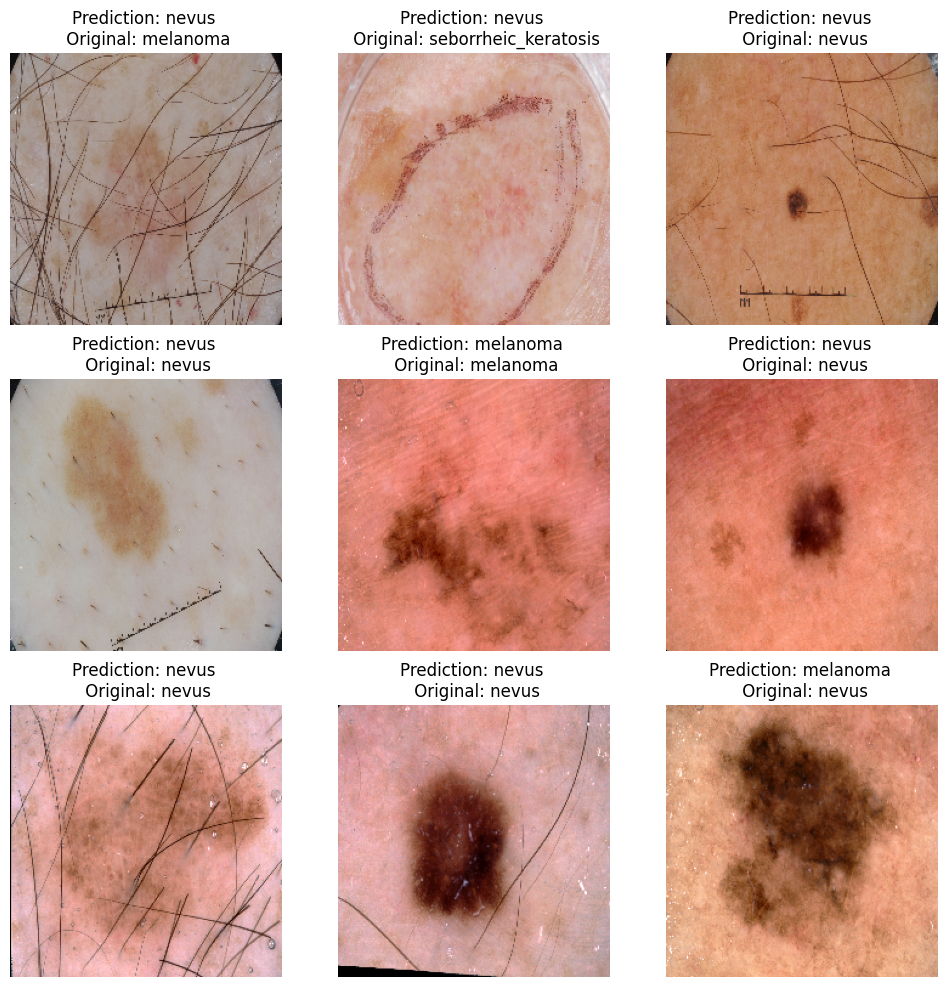

In [ ]:
plt.figure(figsize=(12, 12))

# Get the class names from the train_data
class_names = list(train_data.class_indices.keys())

# Get a batch of images and labels from the test_data
images, labels = next(test_data)

# Loop through 9 images, predict their labels using DenseNet169, and display them with their predictions
for i in range(9):
    image = images[i]
    label = labels[i]

    densenet_model_prediction = densenet_model.predict(np.expand_dims(image, axis=0))

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Prediction: {class_names[np.argmax(densenet_model_prediction[0])]} \n Original: {class_names[np.argmax(label)]}")
    plt.axis("off")

# Display the images with their predicted and original labels
plt.show()

In [ ]:
from tqdm import tqdm

# Define a function to filter melanoma images and their corresponding labels from the test_data
def filter_melanoma_images(test_data, max_iterations=25):
    melanoma_images = []
    melanoma_labels = []

    # Iterate through the test_data up to the specified maximum number of iterations
    for i, (images, labels) in tqdm(enumerate(iter(test_data)), desc="Filtering melanoma images", total=max_iterations):
        # Find the indices of melanoma images in the current batch
        melanoma_indices = np.where(np.argmax(labels, axis=1) == test_data.class_indices["melanoma"])[0]

        # If there are any melanoma images in the batch, add them to the melanoma_images and melanoma_labels lists
        if len(melanoma_indices) > 0:
            melanoma_images.extend(images[melanoma_indices])
            melanoma_labels.extend(labels[melanoma_indices])

        # Stop iterating if the maximum number of iterations has been reached
        if i >= max_iterations - 1:
            break

    return np.array(melanoma_images), np.array(melanoma_labels)

In [ ]:
!pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
melanoma_images, melanoma_labels = filter_melanoma_images(test_data)


Filtering melanoma images:  96%|█████████▌| 24/25 [12:00<00:30, 30.00s/it]


1/1 [==============================] - 0s 31ms/step


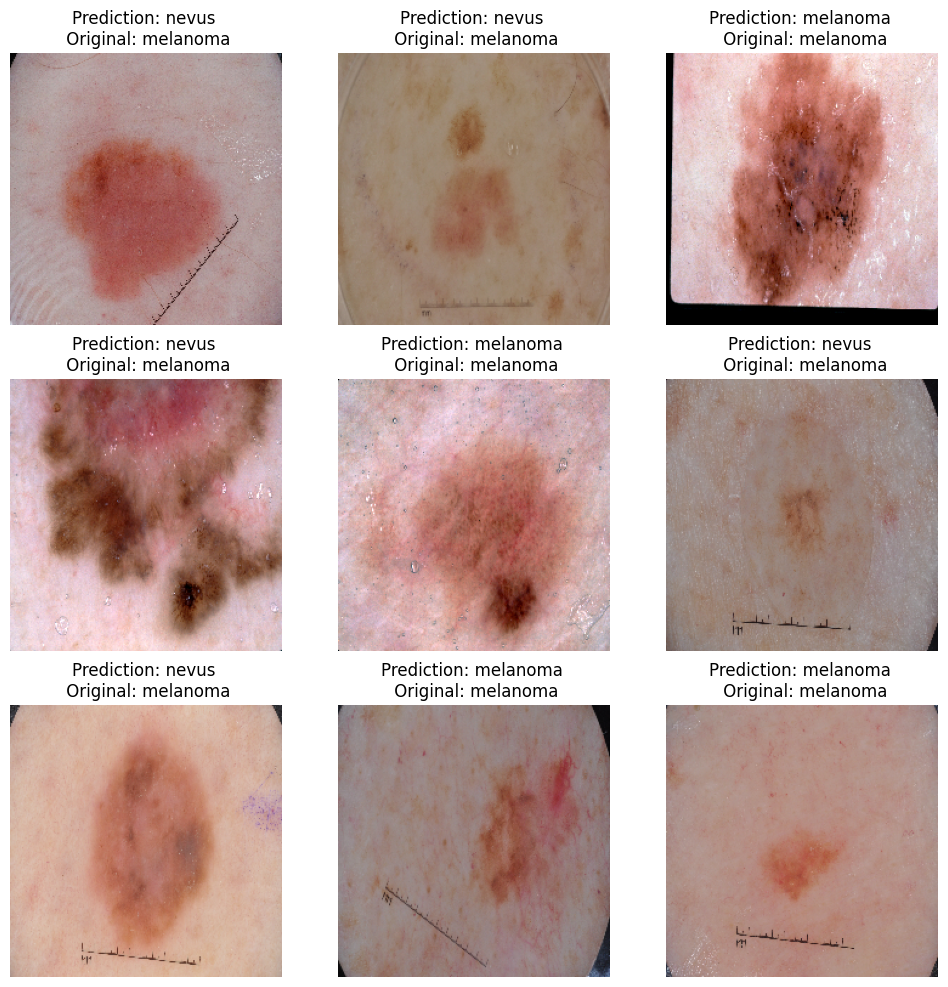

In [ ]:
plt.figure(figsize=(12, 12))

# Loop through up to 9 melanoma images, predict their labels using DenseNet169, and display them with their predictions
for i in range(9):
    if i < len(melanoma_images):
        image = melanoma_images[i]
        label = melanoma_labels[i]

        densenet_model_prediction = densenet_model.predict(np.expand_dims(image, axis=0))

        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Prediction: {class_names[np.argmax(densenet_model_prediction[0])]} \n Original: {class_names[np.argmax(label)]}")
        plt.axis("off")

# Display the melanoma images with their predicted and original labels
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Define a function to extract true and predicted labels from a model and data generator
def get_true_and_predicted_labels(model, data_generator):
    true_labels = []
    predicted_labels = []

    # Iterate through the data generator and collect true and predicted labels
    for i in range(len(data_generator)):
        images, labels = data_generator.next()
        true_labels.extend(np.argmax(labels, axis=1))

        preds = model.predict(images)
        predicted_labels.extend(np.argmax(preds, axis=1))

    return np.array(true_labels), np.array(predicted_labels)

# Call the function with your DenseNet169 model and test_data generator
true_labels, predicted_labels = get_true_and_predicted_labels(densenet_model, test_data)

2/2 [==============================] - 0s 149ms/step


In [ ]:
true_labels, predicted_labels = get_true_and_predicted_labels(densenet_model, test_data)

2/2 [==============================] - 0s 146ms/step


In [ ]:
#Classification report
class_names = list(test_data.class_indices.keys())
print(classification_report(true_labels, predicted_labels, target_names=class_names))

                      precision    recall  f1-score   support

            melanoma       0.40      0.51      0.45       111
               nevus       0.76      0.83      0.79       394
seborrheic_keratosis       0.96      0.24      0.39        95

            accuracy                           0.68       600
           macro avg       0.70      0.53      0.54       600
        weighted avg       0.72      0.68      0.67       600



In [ ]:
# Binarize the true labels
n_classes = len(class_names)
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], densenet_model.predict(test_data)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


10/10 [==============================] - 279s 28s/step


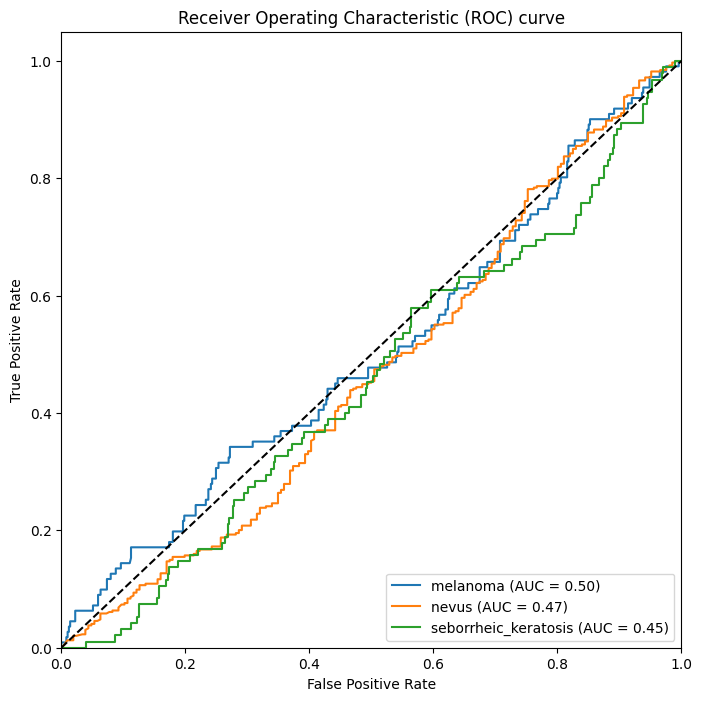

In [ ]:
plt.figure(figsize=(8, 8))

for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
#Fit the model
history = densenet_model.fit(train_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))


Epoch 1/5
28/28 [==============================] - 721s 25s/step - loss: 0.6372 - accuracy: 0.7399 - val_loss: 1.3990 - val_accuracy: 0.5200
Epoch 2/5
28/28 [==============================] - 278s 10s/step - loss: 0.4977 - accuracy: 0.7802 - val_loss: 1.4768 - val_accuracy: 0.5400
Epoch 3/5
28/28 [==============================] - 278s 10s/step - loss: 0.4712 - accuracy: 0.7957 - val_loss: 1.3157 - val_accuracy: 0.6067
Epoch 4/5
28/28 [==============================] - 281s 10s/step - loss: 0.4159 - accuracy: 0.8251 - val_loss: 1.4132 - val_accuracy: 0.6333
Epoch 5/5
28/28 [==============================] - 277s 10s/step - loss: 0.3972 - accuracy: 0.8308 - val_loss: 1.4524 - val_accuracy: 0.6133


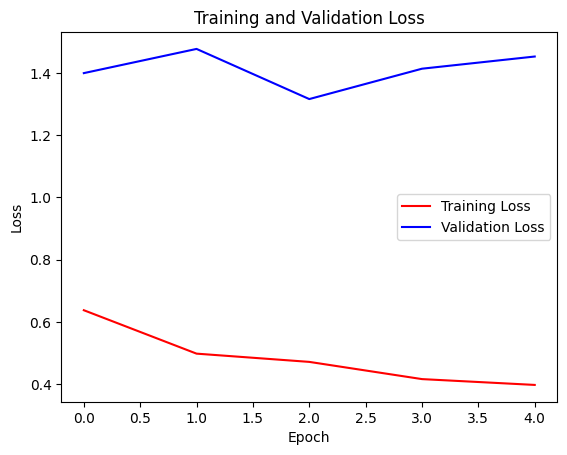

In [15]:
import matplotlib.pyplot as plt

# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(train_loss))

# Plot training and validation loss
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
